**ML6 Понижение размерности**<br>
ПИ19-3 Деменчук Георгий

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

**1. Сформируйте случайную двумерную область точек**

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

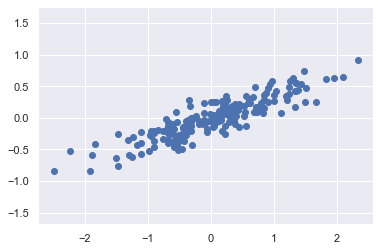

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2,200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

**2. Используйте метод главных компонент для понижения размерности**

In [3]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


**3. Инвертируйте данные полученные после понижения размерности и выведите их на график.**

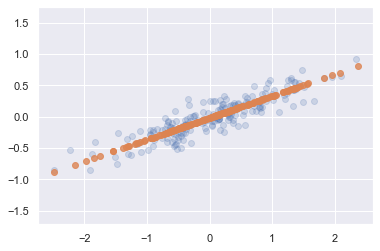

In [4]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');


**4. Скачайте датасет с цифрами (load_digits)**

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

Т.к. каждое изображение 8 на 8 пикселей, то получаем 64 пискеля, 1797 элементов всего

In [6]:
digits.data.shape

(1797, 64)

**5. Используйте метод главных компонент для понижения размерности до 2**

In [7]:
pca = PCA(n_components=2)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print("original shape:   ", digits.data.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1797, 64)
transformed shape: (1797, 2)


In [8]:
print(pca.components_)

[[-3.16987485e-17 -1.73094642e-02 -2.23428832e-01 -1.35913293e-01
  -3.30322842e-02 -9.66341161e-02 -8.32947380e-03  2.26899565e-03
  -3.20516246e-04 -1.19308888e-01 -2.44451679e-01  1.48512737e-01
  -4.67319039e-02 -2.17740732e-01 -1.48137054e-02  4.47779351e-03
  -4.94135076e-05 -7.95419151e-02  8.33951090e-02  2.15915311e-01
  -1.72126809e-01 -1.63712075e-01  2.86444532e-02  4.23251951e-03
   9.85489075e-05  6.42319329e-02  2.54093326e-01 -3.56771082e-02
  -2.09462612e-01 -4.31311355e-02  5.13119003e-02  2.13422777e-04
  -0.00000000e+00  1.59950888e-01  3.68690820e-01  1.64406884e-01
   8.52007854e-02  3.72982430e-02  2.15867007e-02 -0.00000000e+00
   1.28865555e-03  1.06945262e-01  3.03067423e-01  2.47813018e-01
   2.09637303e-01  1.22324956e-02 -3.69458570e-02  1.61485015e-03
   6.93023233e-04 -8.35145681e-03 -5.58599455e-02  9.30533904e-02
   1.07387741e-01 -1.37734542e-01 -6.32879483e-02  9.61672940e-04
   9.55075879e-06 -1.40786852e-02 -2.35675490e-01 -1.41225579e-01
  -9.15961

(-1.149729680495973e-15,
 1.0577756386565541e-15,
 -0.7278268799390495,
 8.415610803806622)

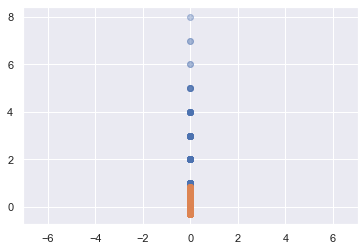

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(digits.data[:, 0], digits.data[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

**7. Используйте метод главных компонент с количеством компонентов – 64.**

In [10]:
pca = PCA(n_components=64)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print("original shape:   ", digits.data.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1797, 64)
transformed shape: (1797, 64)


(-2.5163220740207918e-27,
 1.5307143286570022e-27,
 -0.4000000000000168,
 8.400000000000016)

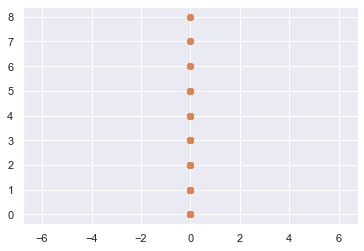

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(digits.data[:, 0], digits.data[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

**8. Постройте график объяснимости модели в зависимости от компонентов.**

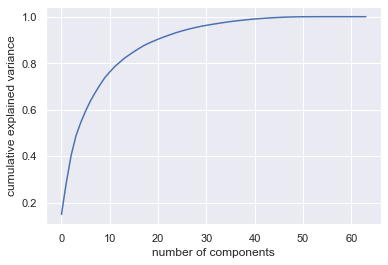

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

С количеством компонентов объяснимость модели возрастает, что выглядит логично

**9. Добавьте шума в датасет. Выведите на экран обычные и зашумленные данные.**

Выводим на экран данные

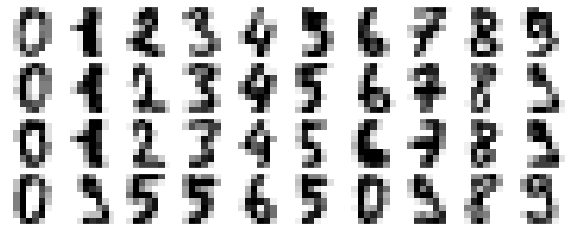

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

plot_digits(digits.data)

Добавление шума в датасет

In [14]:
#Задает начальные условия для генератора случайных чисел.
#Генератор инициализированный одними и теми же начальными условиями, выдает абсолютно идентичные случайные последовательности.
np.random.seed(42)

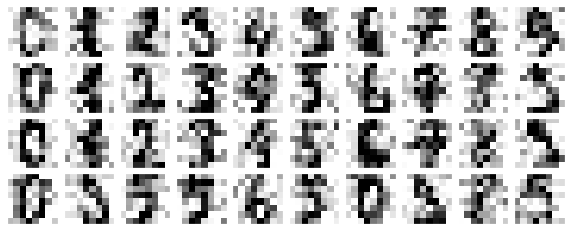

In [15]:
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

**10. Найти минимальное количество компонентов необходимое для сохранения хотя бы на 50% информации о датасете.**

In [16]:
pca = PCA(0.5).fit(noisy)

**11. Используйте метод главных компонент для понижения размерности с количеством компонент из пункта 10.**

In [17]:
pca = PCA(n_components=12)
pca.fit(noisy)
X_pca = pca.transform(noisy)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (1797, 12)


**12. Инвертируйте данные полученные после понижения размерности и выведите их на экран.**

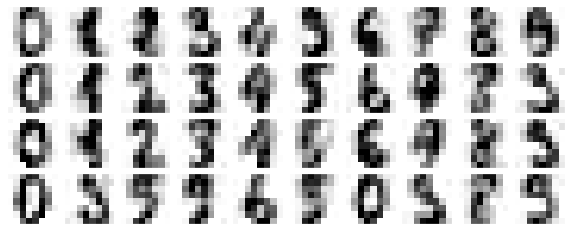

In [18]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

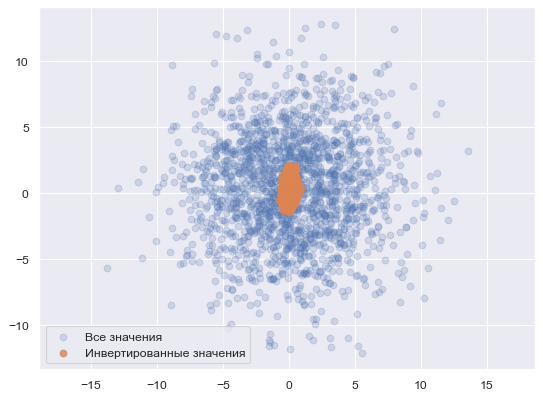

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
X_new = pca.inverse_transform(X_pca)
s1 = plt.scatter(noisy[:, 0], noisy[:, 1], alpha=0.2)
s2 = plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.legend((s1, s2),('Все значения', 'Инвертированные значения'), scatterpoints=1)

Как видно выше, мы можем использовать инвертированные данные после понижения размерности, тем самым уменьшая визуальные искажения на изображении

**13. Сделайте вывод о применимости модели**

Модель можно применять т.к. после понижения размерности до 12 категорий и инверсии данных существенно уменьшается количество шумов.
Как следствие, улучшается общее качество изображения